# Week 6- Machine Learning

**Objectives**: Today we are going to work with some basic machine learning algorithms. Machine learning is a rich and exciting area of computer science that is often considered a subset of the broader field of artifical intellegence. At its most basic level, machine learning seeks to build algorithms that allow systems to perform actions without explicitly being programmed. Today we are going to: 
  
* Review applications of machine learning
* Use a supervised learning model
* Use an unsupervised learning model

## Machine Learning

Machine learning is a core component of many data-driven products. Recommendation engines, self-driving cars, credit scoring, spam filtering, product ranking, customer support, and even medical diagnoses are all examples of where machine learning is being applied. 

Machine learning is in the top five skills identified in LinkedIn profiles of current data scientists. 

<img src="https://raw.githubusercontent.com/azbones/big_data/master/images/rjmetrics-ml.png">
(source: https://rjmetrics.com/resources/reports/the-state-of-data-science/)


There are now even dedicated machine learning firms like Dato seeking to deliver simple machine learning products at scale:

* [Dato](https://dato.com/): "Sophisticated Machine Learning Made Easy"

Amazon Web Services has a machine learning product which can be used for batch or real time analysis on their infrastructure.

* [Amazon Web Services Machine Learning](https://aws.amazon.com/machine-learning/)

Google recently open-sourced part of their machine learning libraries which are available at:

* "[Tensorflow](http://www.tensorflow.org/) is designed to facilitate research in machine learning, and to make it quick and easy to transition from research prototype to production system."

Microsoft's Azure platform now has a machine learning product that is part of their Cortana Analytics Suite which has a drag and drop interface (ML Studio) for deploying machine learning in their cloud using R and Python.

* [Azure Machine Learning](https://azure.microsoft.com/en-us/services/machine-learning/) is "a fully managed big data and advanced analytics suite that enables you to transform your data into intelligent action."


Even non-profits like Kahn Academy are using machine learning in their production systems:

* [Khan Academy Machine Learning → Measurable Learning](http://derandomized.com/post/51729670543/khan-academy-machine-learning-measurable)

If you are interested in learning more about Machine Learning, I suggest the course by Andrew Ng from Stanford which is available on Coursera:

* https://www.coursera.org/learn/machine-learning

## Supervised Learning

One way to subdivide the machine learning domain is by supervised or unsupervised learning. 

In supervised learning, a training dataset is being to build a model which is then applied to new observations to make predictions. The training dataset has both the predictor variables (often called features in ML parlence) and the "correct" answers or outcome that you are seeking to predict. In traditional statistics classes, the model features will be called independent variables and the predicted value are dependent variables.

Often after developing the model, a seperate, test dataset is used to measure how well the model performs with new data.

Predictions can include:

* **Classification:** The model is used to classify observations into categorical values or classes (e.g.- for a cancer test, there might be the categories of "benign", "precancerous", and "malignant").

* **Regression:** The model is used to predict values that are continuous in nature (e.g.- measures with infinite measures like temperature).

Supervised machine learning algorithms can include:

* Decision trees
* Discriminant analysis
* Naïve Bayes classifiers
* Nearest neighbors
* Neural networks
* Support machine vectors

Today, we are going to use the Nearest Neighbor or K-Nearest Neighbor (KNN) algorithm to explore supervised learning in a classification example.

**KNN Algorithm**

KNN is one of the simplest and most used supervised learning algorithms. While it can be used for both regression and classification, we are going to use it for classification.

Simply, the algorithm uses the distance between an observation's feature vector (the values of the features that describe it) and the training dataset to determine group membership. 

The K refers to the number of neighbors you set to evaluate versus each observation. The algorithm uses distance (most often Euclidian although there are many options here) to determine the K closest neighbors and then classify the observation based on the class that results in the smallest misclassification cost. So, if you select a K of five and three of the five closest points are in group A, that observation would be classified as part of group A. You should select odd values of K to avoid any ties when calculating the lowest misclassification cost.

**Create Synthetic Dataset**

To begin, we are going to create a synthetic dataset using the scikit-learn machine learning library. The <code>make_blobs</code> function allows us to create different distinct groups which populates group membership from a gaussian distribution.

Our synthetic dataset will have 1000 samples, 5 defined centers, and 2 features.

```
X -upper case X- represents the matrix of feature values
y -lower case y- represents the 1-dimensional vector of outcome categories
```
Run the code in the following block to generate the data.

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=1000, centers=5, n_features=2,
                  random_state=4)

In [ ]:
# Explore X and y to see the shape of the arrays and their values


Next, while we could work with the numpy arrays directly, we are going to read them into a pandas dataframe for convienence. Do that in the next codeblock.

In [ ]:
# Create a dataframe from numpy arrays

import pandas as pd
df = pd.DataFrame(data=X, index=y, columns=['feature 1', 'feature 2'])

Compare the dataframe structure to the numpy array below. Where are X and y represented?

**Plot the Synthetic Data**

Now, we are going to plot the features as x and y coordinates and the outcome groupings by color. Remember this data is our training dataset, so we have both the predictors (x and y coordinates on our graph) and the thing we want to predict, group membership. Practically, an example of this might be features of e-mail and whether we, as experts, classified those individual messages as spam or non-spam.

Plot the data below.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Plot data
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (10.0, 10.0)
group1 = plt.scatter(df['feature 1'].ix[0], df['feature 2'].ix[0], c='b', label='group 1')
group2 = plt.scatter(df['feature 1'].ix[1], df['feature 2'].ix[1], c='c', label='group 2')
group3 = plt.scatter(df['feature 1'].ix[2], df['feature 2'].ix[2], c='r', label='group 3')
group4 = plt.scatter(df['feature 1'].ix[3], df['feature 2'].ix[3], c='k', label='group 4')
group5 = plt.scatter(df['feature 1'].ix[4], df['feature 2'].ix[4], c='w', label='group 5')
legend = plt.legend(handles=[group1,group2,group3,group4,group5], frameon=1)
legend.get_frame().set_facecolor('#ffffff')
plt.show()

**Build the KNN Model**

Next, we are going to build our KNN classifier and fit the model to the training data.  For this initial attempt, we will use a K value of 1.

In [ ]:
from sklearn import neighbors, datasets

# Create KNN classifier and fit model
X, y = df.values, df.index
n_neighbors = 1
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X, y)

**Predict Group Membership for a New Observation**

Now we have a classifier that can take any two feature inputs and predict group membership. Populate the features with some example values and run the prediction in the next block.

In [ ]:
# Predict group membership based values entered in predict fucntion

classes = ['Group 1','Group 2','Group 3','Group 4','Group 5']
obs_one = 100
obs_two = 250

prediction = classes[knn.predict([[obs_one, obs_two]])[0]]

print 'An observation with feature-one value of {} and feature-two value of '\
      '{} is a member of {}'.format(obs_one,obs_two,prediction)

**Plot the Feature Space for the Model**

Because we only have two features in our test dataset, we can plot all predicted values on a two-dimensional plane to visualize how the algorithm is working. This is accomplished by building a meshgrid or array of every possible space in the plot and using the KNN classifier to predict group membership for all these values. Each group is assigned a distinct color.

Run the code below to see the plot of all predictions within the space defined by the min and max for each feature.

In [ ]:
import numpy as np
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

# Set up colors for mesh
mesh_cmap = ListedColormap(['#9E9AB2', '#FFBE8C', '#7F63FF', '#3CCC3B', '#83B283'])


# Set up array for plotting predictions
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.figure('KNN Without Training Data')
plt.title('KNN with {} Neighbors Without Training Data'.format(n_neighbors))
plt.pcolormesh(xx, yy, Z, cmap=mesh_cmap)
sns.set_style("darkgrid")
plt.xlabel('X Values')
plt.ylabel('Y values')
plt.axis('tight')

**Plot Training Data and the Model Data**

Now, plot the predicted value feature space and then plot the training data over the predictions with the next codeblock.

In [ ]:
plt.figure('KNN with Training Data')
plt.title('KNN with {} Neighbors and Training Data'.format(n_neighbors))
plt.pcolormesh(xx, yy, Z, cmap=mesh_cmap)
group1 = plt.scatter(df['feature 1'].ix[0], df['feature 2'].ix[0], c='b', label='group 1')
group2 = plt.scatter(df['feature 1'].ix[1], df['feature 2'].ix[1], c='c', label='group 2')
group3 = plt.scatter(df['feature 1'].ix[2], df['feature 2'].ix[2], c='r', label='group 3')
group4 = plt.scatter(df['feature 1'].ix[3], df['feature 2'].ix[3], c='k', label='group 4')
group5 = plt.scatter(df['feature 1'].ix[4], df['feature 2'].ix[4], c='w', label='group 5')
legend = plt.legend(handles=[group1,group2,group3,group4,group5], frameon=1)
legend.get_frame().set_facecolor('#ffffff')
sns.set_style("darkgrid")
plt.xlabel('X Values')
plt.ylabel('Y values')
plt.axis('tight')

**N-dimensional Features**

While our example using two features was instructive as a visualization, most machine learning problems will have many more features. Unfortunately, plotting the feature space of predictions is not possible beyond three dimensions (even three dimensional plots are difficult to use given they are rendered in two dimensions). The KNN models work exactly the same way, regardless of the number of features.

Build a synthetic dataset with three features below.

In [ ]:
X2, y2 = make_blobs(n_samples=1000, centers=4, n_features=3,
                  random_state=4)
df2 = pd.DataFrame(data=X2, index=y2, columns=['feature 1', 'feature 2', 'feature 3'])

Plot the training values with a 3D projection.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid")
mpl.rcParams['figure.figsize'] = (10.0, 10.0)
fig = plt.figure('3D')
ax = fig.add_subplot(111, projection='3d')
group1 = ax.scatter(df2['feature 1'].ix[0], df2['feature 2'].ix[0], df2['feature 3'].ix[0], c='b', label='group 1')
group2 = ax.scatter(df2['feature 1'].ix[1], df2['feature 2'].ix[1], df2['feature 3'].ix[1], c='c', label='group 2')
group3 = ax.scatter(df2['feature 1'].ix[2], df2['feature 2'].ix[2], df2['feature 3'].ix[2], c='r', label='group 3')
group4 = ax.scatter(df2['feature 1'].ix[3], df2['feature 2'].ix[3], df2['feature 3'].ix[3], c='k', label='group 4')
ax.set_xlabel('X Values')
ax.set_ylabel('Y Values')
ax.set_zlabel('Z Values')
legend = plt.legend(handles=[group1,group2,group3,group4], frameon=1)
legend.get_frame().set_facecolor('#ffffff')
plt.show()

**Build the KNN Model for Three Features**

Next, we are going to build our KNN classifier and fit the model to the new training data.  For this initial attempt, we will use a K value of 1.

In [ ]:
classes_3d = ['Group 1','Group 2','Group 3','Group 4']
n_neighbors = 1
knn_3d = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
knn_3d.fit(X2, y2)

**Predict Group Membership with Three Values**

Populate the observation values and predict group membership below.

In [ ]:
obs_3d_one = 
obs_3d_two = 
obs_3d_three = 

prediction_3d = classes_3d[knn_3d.predict([[obs_3d_one, obs_3d_two, obs_3d_three]])[0]]

print 'An observation with a feature-one value of {}, a feature-two value of '\
      '{}, and a feature-three value of {} is a member of {}'.format(obs_3d_one,obs_3d_two,
                                                                     obs_3d_three,prediction_3d)

## Unsupervised Learning

One way to subdivide the machine learning domain is by supervised or unsupervised learning. 

As you may have guessed, unsupervised learning does not use a training set, but instead draws inferences about the data from the data itself without defined labels.

The most common use case for unsupervised learning is cluster analysis. Examples of cluster analysis include:

* **Genetic Classification:** Genone sequencing dataset can be used to group individuals or organisms with similar properties.

* **Document Classification:** Documents with similar topics, based on NLP, can be grouped together. 
* **Behavioral Cohort Analysis:** Clustering users together based on their behavior.


Unsupervised machine learning algorithms can include:

* Gaussian mixture models
* Hidden Markov models
* Hierarchial clustering
* k-Means clustering

We are going to use the k-Means algorithm, again from the sci-kit learn package, to explore unsupervised learning.

**k-Means Algorithm**

The k-means algorithm is an interative algorithm that starts by locating the k cluster centers in arbitrary locations within the multidimensinal feature space. It then assigns each observation to the mean center that it is closest to using a distance calculation (usually Euclidian). It then iterates through randomly assigned cluster centers until has minimized the distance from each observation to its cluster center. This is calculated by looking at the sum of distances for all observations to the selected center over all the centers. 

Given its simplicity, k-means also has higher performance than other clustering techniques and is therefore quite popular for larger datasets.

**Create Synthetic Dataset**

We are again going to create a synthentic dataset, but we are not going to use the group membership in our model. This is the definition of unsupervised learning. While we will know apriori how many clusters our data has, this will allow us to better understand the algorithm as we evaluate different models with the data.

In [60]:
Xkm, ykm = make_blobs(n_samples=5000, centers=10, n_features=2,
                  random_state=7)
kmeans_df = pd.DataFrame(data=Xkm, index=None, columns=['feature 1', 'feature 2'])

In [4]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

In [ ]:
kmeans_df

**Plot the Synthetic Data**

Now we will plot the data.  Notice we are not using group membership in our dataframe or our plot. Our synthetic dataset will have some well defined groups that are clearly seen in a two dimensional plot and some clusters that are overlapping the same feature space. 

Most real datasets will be more complex in that they have many more features and less differentiation among these features, so clusters are not as likely to be seen in plots given less uniform distributions.

Run the code below to plot the data. Count the number of clusters that are clearly visable in the plot.

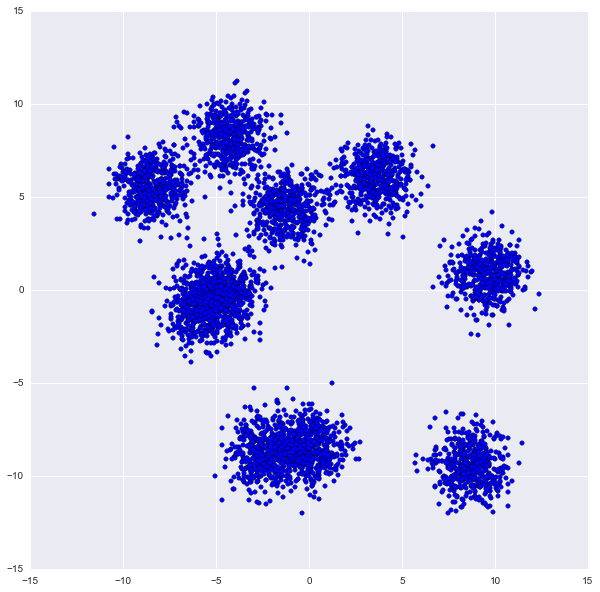

In [62]:
# Plot data
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (10.0, 10.0)
plt.scatter(kmeans_df['feature 1'], kmeans_df['feature 2'], c='b')
plt.show()

**Build the k-means Model**

We are again going to use the sci-kit learn package to build our model. Other than the data, the key input into k-means is k or the number of clusters you want to model. We will review how to evaluate different values for k after we build our initial model. Other unsupervised algorithms can derive the number of clusters on their own, but also come with more complexity.

Depending on the dataset, the number of iterations defined by the <code>init</code> parameter can also be important as k-means can be subject to local minima which will result in poor cluster results. Given k-means uses random inputs, it is often useful to run it multiple times to assure that it is consistently converging.

We will start with three clusters to see how the algorithm handles the synthetic data.

Run the codeblock below to create the model with three centers and fit it to the data.

In [100]:
from sklearn.cluster import MiniBatchKMeans, KMeans

cluster_num = 10

k_means = KMeans(n_clusters=cluster_num, init='k-means++', n_init=100)
k_means.fit(kmeans_df.ix[:,:-1])
kmeans_df['cluster'] = k_means.labels_

Now, plot the data using the cluster numbers that we added to the dataframe. Remember, the actual cluster membership, or ground truth in machine learning terms, is not part of our data.

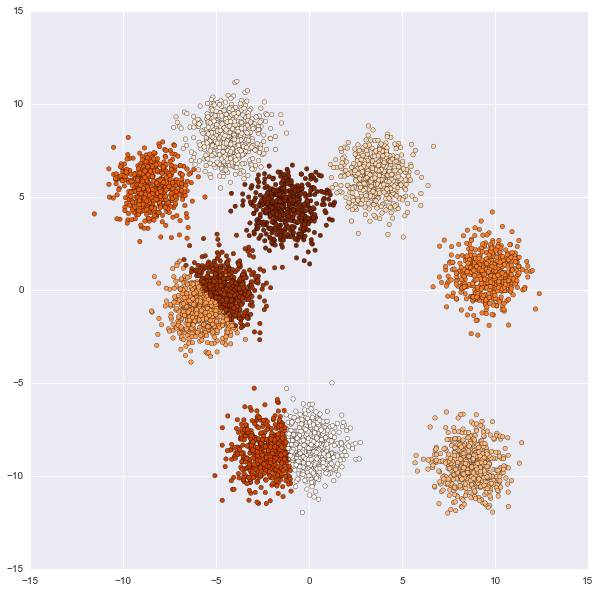

In [101]:
import matplotlib.cm as cm
plt.scatter(kmeans_df['feature 1'],kmeans_df['feature 2'],c=kmeans_df['cluster'], cmap=cm.Oranges)

**Print Cluster Centers**

We can directly access the cluster center coordinates from our model by calling the <code>cluster\_centers\_</code> attribute.

Print those below.

In [96]:
print k_means.cluster_centers_

[[ 6.49222988  3.45988233]
 [-4.91673417  3.41571151]
 [ 2.1107708  -8.91060119]]


Now, let's replot the data with the color coded cluster membership along with the cluster centers as large x's.

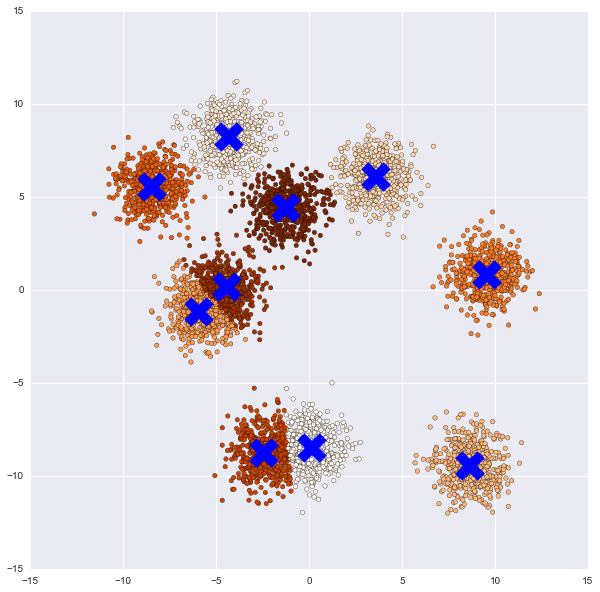

In [102]:
plt.scatter(kmeans_df['feature 1'],kmeans_df['feature 2'],c=kmeans_df['cluster'], cmap=cm.Oranges)
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], marker='x', s=500, linewidths=10)

**Change K**

Now, go back through the code and change K to different values and rerun the model and plots to see how the algorithm performs.

In [104]:
kmeans_df.ix[:,:-1].values

array([[-8.42040957,  4.7481419 ],
       [-4.6721602 ,  1.29257689],
       [-6.23298066,  0.30118093],
       ..., 
       [-4.22726129,  7.4201067 ],
       [-0.49680426, -8.79213809],
       [-1.2736602 ,  4.96394423]])

In [137]:
D_k[4]


array([[ 15.23036096,   3.90530106,   6.17011669,  14.99065709,
         22.20619625],
       [ 10.53560039,   4.827274  ,   1.80837763,  11.39223123,
         17.11674941],
       [ 10.28032128,   6.00049019,   1.3541982 ,  13.13006319,
         17.79598879],
       ..., 
       [ 16.35082534,   1.40733478,   7.93087192,  11.45143116,
         21.22571336],
       [  0.68071643,  15.50958505,   9.52482256,  14.10742225,
          9.17363437],
       [ 13.60494358,   3.6761234 ,   6.64654758,   7.93339292,
         17.50214403]])

In [110]:
from scipy.spatial.distance import cdist
import numpy as np

K = range(1,15)
X = kmeans_df.ix[:,:-1].values

# Run k-means for all K values to generate cluster centers
centroids = []
for k in K:
    k_means = KMeans(n_clusters=k, init='k-means++', n_init=100)
    k_means.fit(kmeans_df.ix[:,:-1])
    centroids.append(k_means.cluster_centers_)

# Calculate distances to all centroids for all K    
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]    

# Determine min distance per K
dist = [np.min(D,axis=1) for D in D_k]

# Computer average min distance
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

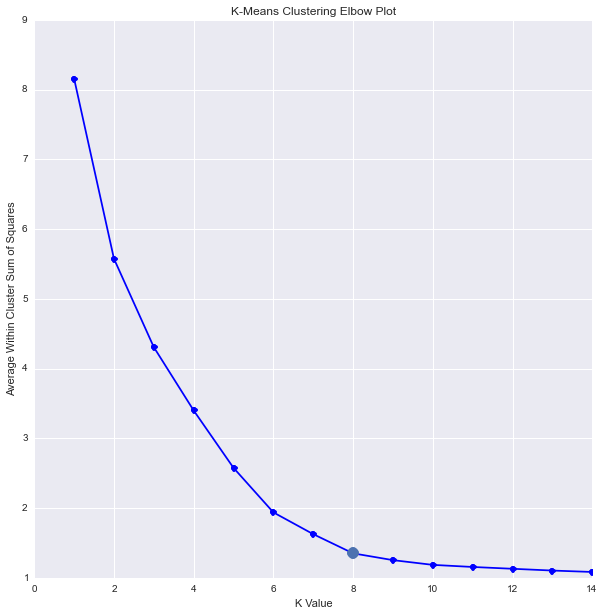

In [147]:
kink = 8-1

fig = plt.figure('Elbow Plot')
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'bo-')
ax.plot(K[kink], avgWithinSS[kink], marker='o', markersize=12, c='r')
plt.xlabel('K Value')
plt.ylabel('Average Within Cluster Sum of Squares')
plt.title('K-Means Clustering Elbow Plot')